# **Job Data Preprocessing-Tech in Asia Dataset**

## **Load Library dan dataset**

In [6]:
# Data Processing
import pandas as pd
import re

# Akses Google Drive (Google Colab)
from google.colab import drive

In [7]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file di Google Drive
path_folder = '/content/drive/MyDrive/DATA SKRIPSI/Project Github'

# Baca ketiga file
df1 = pd.read_excel(f'{path_folder}/techinasia-scraper1.xlsx')
df2 = pd.read_excel(f'{path_folder}/techinasia-scraper2.xlsx')
df3 = pd.read_excel(f'{path_folder}/techinasia-scraper3.xlsx')

# Gabungkan semua file
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# (Opsional) Cek jumlah baris hasil gabungan
print(f"Jumlah total data setelah digabung: {df_combined.shape[0]}")

# Simpan hasil ke file baru di Google Drive
output_path = f'{path_folder}/data lowongan kerja Tech In Asia.xlsx'
df_combined.to_excel(output_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah total data setelah digabung: 858


In [8]:
# Path ke file gabungan di Google Drive
file_path = '/content/drive/MyDrive/DATA SKRIPSI/Project Github/data lowongan kerja Tech In Asia.xlsx'

# Membaca data gabungan
df = pd.read_excel(file_path)
df

,web-scraper-order,web-scraper-start-url,Link,Link-href,Nama Pekerjaan,Nama Perusahaan,Lokasi,Gaji,Jobdesc dan Req,Required skills
0,1731426452-1,https://www.techinasia.com/jobs/search?country...,Senior Backend Developer (PPOB),https://www.techinasia.com/jobs/20235af8-6220-...,Senior Backend Developer (PPOB),Pintar Ventura Group,"Jakarta, Indonesia",NaN,"Design, develop, and maintain strong, scalable...","Golang, SQL, Unit Testing, Redis"
1,1731426454-2,https://www.techinasia.com/jobs/search?country...,Cyber Security Manager,https://www.techinasia.com/jobs/430b5094-f6dd-...,Cyber Security Manager,PT. ASLI Rancangan Indonesia,"Jakarta, Indonesia",NaN,Monitor our systems for security breaches and ...,"Information Security, Security, Network Securi..."
2,1731426457-3,https://www.techinasia.com/jobs/search?country...,Senior Data Engineer,https://www.techinasia.com/jobs/5c794f71-52a0-...,Senior Data Engineer,PT Appfuxion Consulting Indonesia,"Jakarta, Indonesia",IDR 1,5+ years of relevant data engineering experien...,"Data Warehouse, SQL, Unix, Artificial Intellig..."
3,1731426459-4,https://www.techinasia.com/jobs/search?country...,Front End Developer,https://www.techinasia.com/jobs/f288c0fe-c602-...,Front End Developer,Bina Nusantara Group,"Jakarta, Indonesia",NaN,Striving for excellence.\nWe continuously do o...,"Front-end Development, Web Development, Progra..."
4,1731426461-5,https://www.techinasia.com/jobs/search?country...,Frontend Engineer,https://www.techinasia.com/jobs/c5a52b03-0508-...,Frontend Engineer,Mediatics Digital Indonesia,"Jakarta, Indonesia",NaN,"Collaborate with teams to develop, test, and d...","Version Control, Software Engineering, Front-e..."
...,...,...,...,...,...,...,...,...,...,...
853,1739469682-211,https://www.techinasia.com/jobs/search?country...,Golang Developer (for Banking Industry),https://www.techinasia.com/jobs/c4ee34d2-360a-...,Golang Developer (for Banking Industry),SIGMATECH,"Jakarta, Indonesia","IDR 11,000,000 – 12,000,000",Job description & requirementsREQUIREMENTS:\nB...,"Golang, MySQL, SQL Server, SQL, PostgreSQL"
854,1739469684-212,https://www.techinasia.com/jobs/search?country...,"Fullstack Developer (React, Next JS, Spring Bo...",https://www.techinasia.com/jobs/d76eb0d1-600d-...,"Fullstack Developer (React, Next JS, Spring Bo...",SIGMATECH,"Jakarta, Indonesia","IDR 10,000,000 – 12,000,000",Job description & requirementsRequirements:\nE...,"Java, Java J2EE, Spring, React.js, Android, No..."
855,1739469686-213,https://www.techinasia.com/jobs/search?country...,PHP Laravel,https://www.techinasia.com/jobs/9d09290e-af26-...,PHP Laravel,Gefami Services Indonesia,"Jakarta, Indonesia","IDR 6,000,000 – 12,000,000",Job description & requirements· Minimum 5 year...,"Laravel, PHP, Databases"
856,1739469688-214,https://www.techinasia.com/jobs/search?country...,Senior Backend Developer,https://www.techinasia.com/jobs/a005a93b-058f-...,Senior Backend Developer,Reku,"Jakarta, Indonesia",NaN,Job description & requirementsWe are looking f...,"Backend Development, Attention to Detail, Prob..."


## **Data Understanding**

---



### **a. Cek Kualitas Data**

In [9]:
df.describe(include='all')

,web-scraper-order,web-scraper-start-url,Link,Link-href,Nama Pekerjaan,Nama Perusahaan,Lokasi,Gaji,Jobdesc dan Req,Required skills
count,858,858,858,858,858,858,858,289,843,858
unique,858,3,569,786,569,67,25,109,734,738
top,1739469690-215,https://www.techinasia.com/jobs/search?country...,Data Engineer,https://www.techinasia.com/jobs/3021175f-dd32-...,Data Engineer,Dealls,"Jakarta, Indonesia","IDR 5,000,000 – 7,000,000",Striving for excellence.\nWe continuously do o...,"Digital Marketing, Business Development, Sales..."
freq,1,450,11,2,11,333,650,15,8,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      858 non-null    object
 1   web-scraper-start-url  858 non-null    object
 2   Link                   858 non-null    object
 3   Link-href              858 non-null    object
 4   Nama Pekerjaan         858 non-null    object
 5   Nama Perusahaan        858 non-null    object
 6   Lokasi                 858 non-null    object
 7   Gaji                   289 non-null    object
 8   Jobdesc dan Req        843 non-null    object
 9   Required skills        858 non-null    object
dtypes: object(10)
memory usage: 67.2+ KB


In [11]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
web-scraper-order          0
web-scraper-start-url      0
Link                       0
Link-href                  0
Nama Pekerjaan             0
Nama Perusahaan            0
Lokasi                     0
Gaji                     569
Jobdesc dan Req           15
Required skills            0
dtype: int64


In [12]:
df['Panjang_Teks_Skills'] = df['Required skills'].apply(len)
# Tampilkan beberapa contoh data
print(df[['Required skills', 'Panjang_Teks_Skills']])

                                       Required skills  Panjang_Teks_Skills
0                   Golang, SQL, Unit Testing, Redis                     34
1    Information Security, Security, Network Securi...                   66
2    Data Warehouse, SQL, Unix, Artificial Intellig...                   57
3    Front-end Development, Web Development, Progra...                   53
4    Version Control, Software Engineering, Front-e...                   92
..                                                 ...                  ...
853         Golang, MySQL, SQL Server, SQL, PostgreSQL                   42
854  Java, Java J2EE, Spring, React.js, Android, No...                  121
855                            Laravel, PHP, Databases                   23
856  Backend Development, Attention to Detail, Prob...                  108
857  UI/UX Design, Attention to Detail, Problem Sol...                  117

[858 rows x 2 columns]


In [13]:
print("Jumlah Baris Duplikat Dataset Pekerjaan:\n")
print(df.duplicated().sum())

Jumlah Baris Duplikat Dataset Pekerjaan:

0


### **b. Visualisasi**

**1. Distribusi Lokasi Lowongan Kerja**

/tmp/ipython-input-1684104872.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_lokasi, x='Jumlah Lowongan', y='Lokasi', palette='viridis')


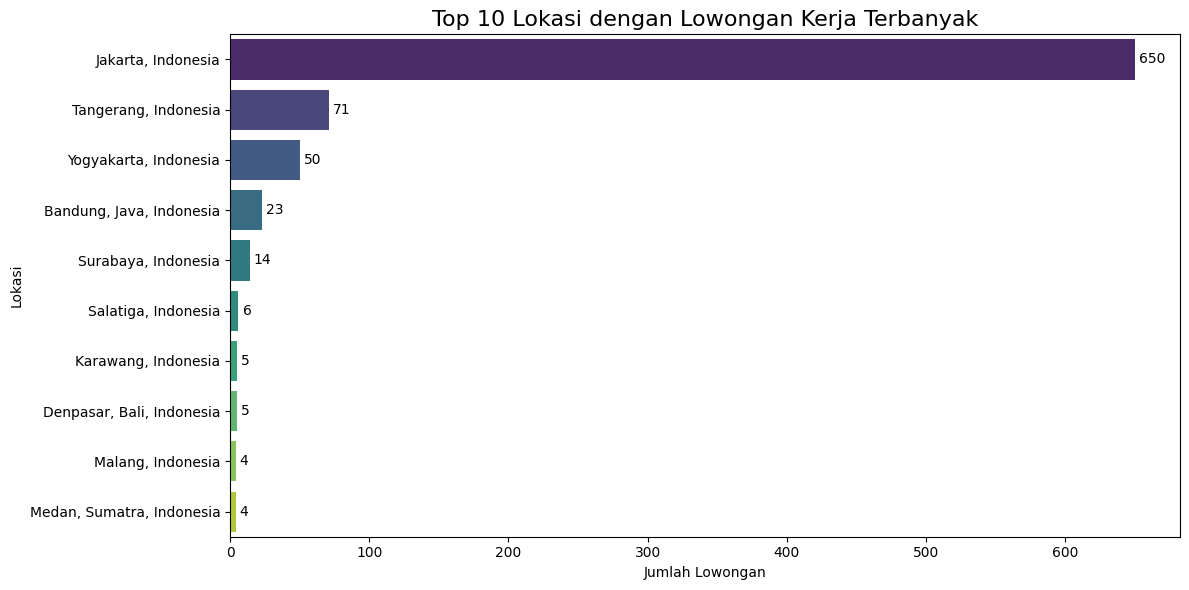

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah lowongan per lokasi
lokasi_counts = df['Lokasi'].value_counts().reset_index()
lokasi_counts.columns = ['Lokasi', 'Jumlah Lowongan']

# Ambil 10 lokasi teratas
top_lokasi = lokasi_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_lokasi, x='Jumlah Lowongan', y='Lokasi', palette='viridis')

# Tambahkan label angka di ujung bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title("Top 10 Lokasi dengan Lowongan Kerja Terbanyak", fontsize=16)
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.tight_layout()
plt.show()

**Top 10 Nama Pekerjaan yang Paling Banyak Membuka Lowongan**

/tmp/ipython-input-831925651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_pekerjaan, x='Jumlah Lowongan', y='Nama Pekerjaan', palette='mako')


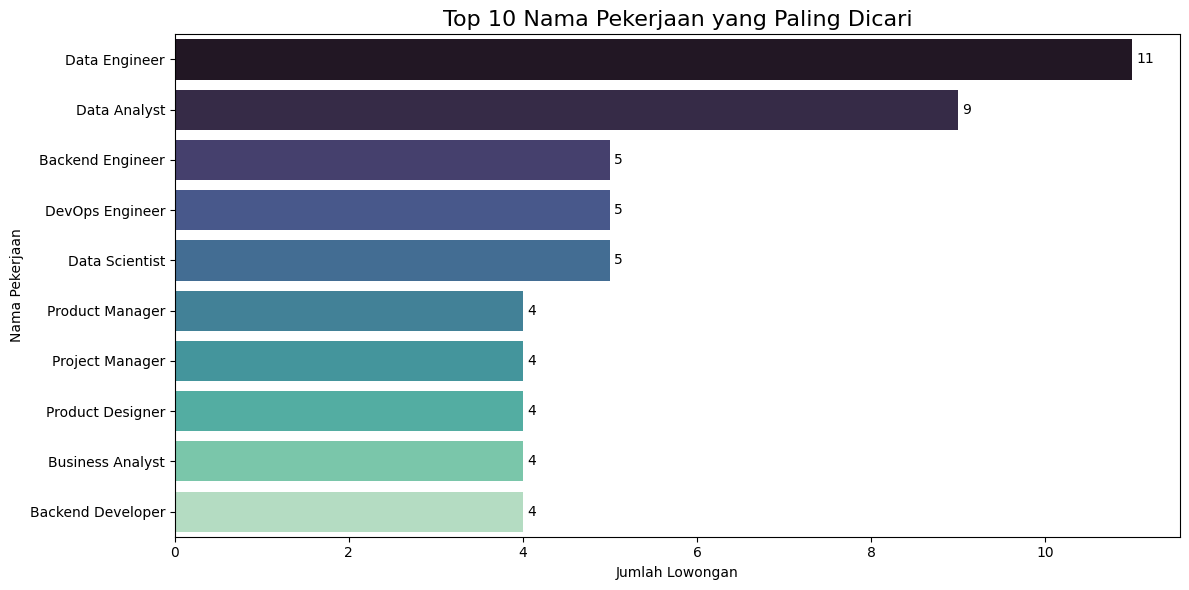

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing pekerjaan
pekerjaan_counts = df['Nama Pekerjaan'].value_counts().reset_index()
pekerjaan_counts.columns = ['Nama Pekerjaan', 'Jumlah Lowongan']

# Ambil 10 pekerjaan teratas
top_pekerjaan = pekerjaan_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_pekerjaan, x='Jumlah Lowongan', y='Nama Pekerjaan', palette='mako')

# Tambahkan label angka di ujung bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title("Top 10 Nama Pekerjaan yang Paling Dicari", fontsize=16)
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Nama Pekerjaan")
plt.tight_layout()
plt.show()

**Top 10 Perusahaan Paling Aktif Merekrut**

/tmp/ipython-input-3807887054.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_perusahaan, x='Jumlah Lowongan', y='Nama Perusahaan', palette='rocket')


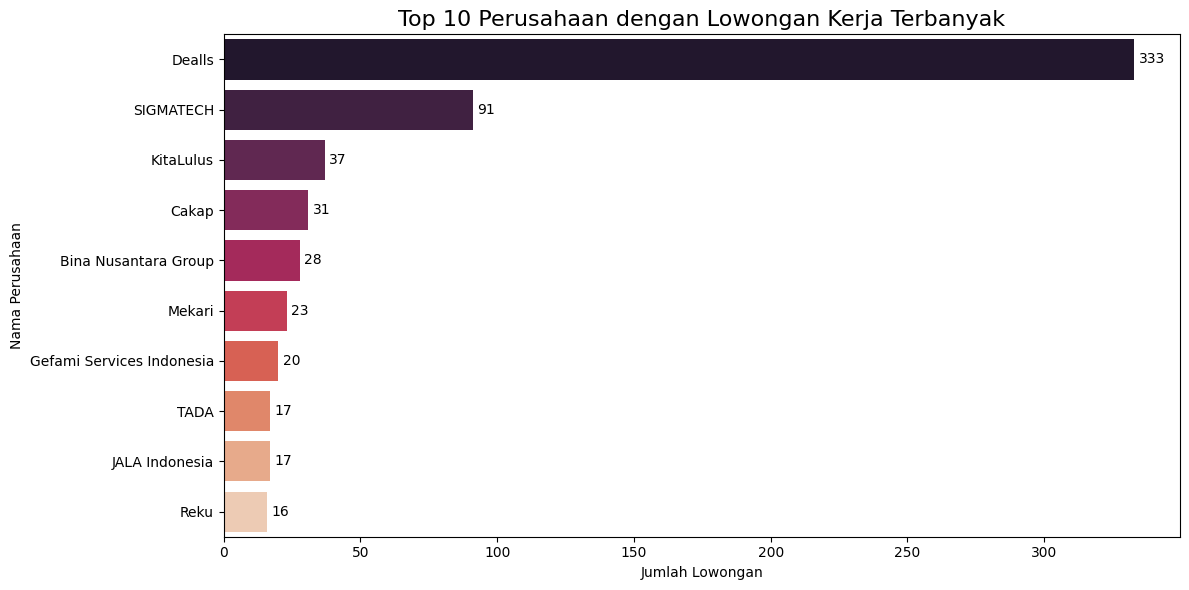

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah lowongan per perusahaan
perusahaan_counts = df['Nama Perusahaan'].value_counts().reset_index()
perusahaan_counts.columns = ['Nama Perusahaan', 'Jumlah Lowongan']

# Ambil 10 perusahaan teratas
top_perusahaan = perusahaan_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_perusahaan, x='Jumlah Lowongan', y='Nama Perusahaan', palette='rocket')

# Tambahkan label jumlah di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title("Top 10 Perusahaan dengan Lowongan Kerja Terbanyak", fontsize=16)
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Nama Perusahaan")
plt.tight_layout()
plt.show()

**Wordcloud: Skill yang Paling Sering Muncul**

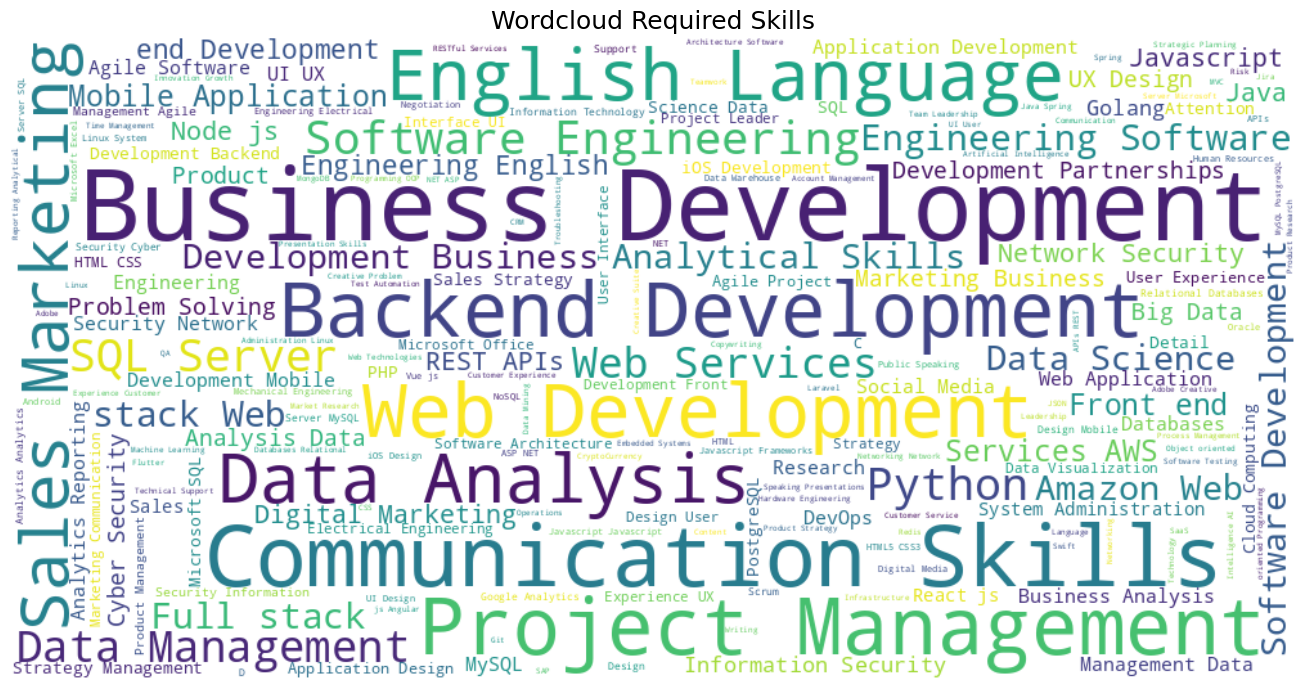

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dari kolom 'Required skills' menjadi satu string
all_skills = ' '.join(str(skill) for skill in df['Required skills'].dropna())

# Buat wordcloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(all_skills)

# Tampilkan
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Required Skills", fontsize=18)
plt.tight_layout()
plt.show()

**Top 10 Skill yang Paling Sering Diminta**

/tmp/ipython-input-383200517.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=skill_df, x='Frekuensi', y='Skill', palette='magma')


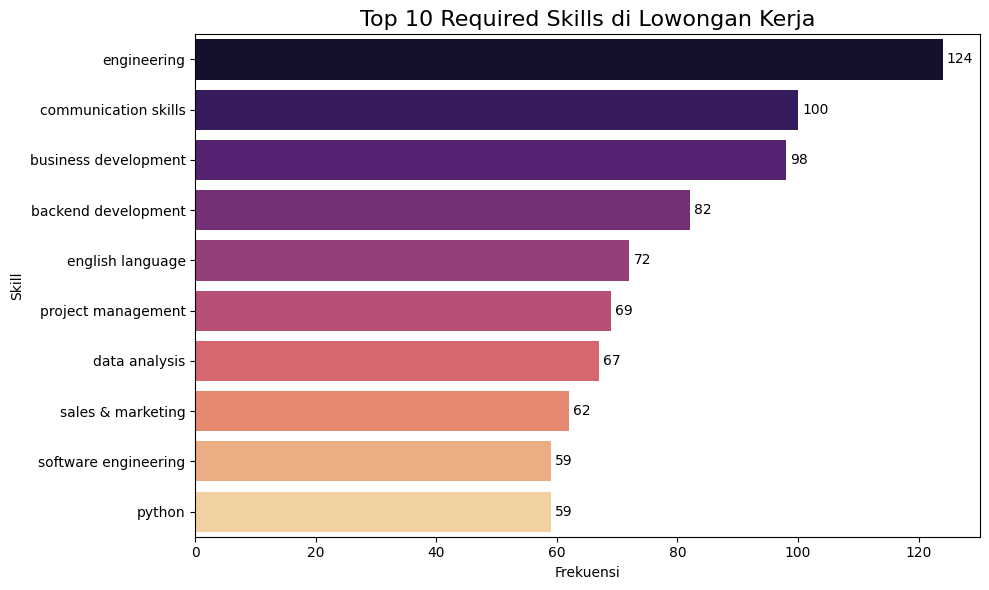

In [18]:
from collections import Counter
import seaborn as sns
import pandas as pd

# Ubah semua skill menjadi list kata (asumsikan skill dipisah koma)
skill_list = []
for row in df['Required skills'].dropna():
    skills = [skill.strip().lower() for skill in row.split(',')]
    skill_list.extend(skills)

# Hitung frekuensi setiap skill
skill_counter = Counter(skill_list)
top_skills = skill_counter.most_common(10)
skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Frekuensi'])

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=skill_df, x='Frekuensi', y='Skill', palette='magma')

# Tambahkan label di ujung bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title("Top 10 Required Skills di Lowongan Kerja", fontsize=16)
plt.xlabel("Frekuensi")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

## **Data Preparation**

### **1. Merapikan Data Gabungan**

In [19]:
print("Daftar kolom pada DataFrame:")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

Daftar kolom pada DataFrame:
1. web-scraper-order
2. web-scraper-start-url
3. Link
4. Link-href
5. Nama Pekerjaan
6. Nama Perusahaan
7. Lokasi
8. Gaji
9. Jobdesc dan Req
10. Required skills
11. Panjang_Teks_Skills


In [20]:
# Hapus kolom yang tidak dibutuhkan
columns_to_drop = ['web-scraper-order', 'web-scraper-start-url', 'Link', 'Link-href', 'Jobdesc dan Req']
df = df.drop(columns=columns_to_drop)

In [21]:
print("Daftar kolom pada DataFrame:")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

Daftar kolom pada DataFrame:
1. Nama Pekerjaan
2. Nama Perusahaan
3. Lokasi
4. Gaji
5. Required skills
6. Panjang_Teks_Skills


In [22]:
# Mengecek duplikat data
duplicated_rows = df[df.duplicated()]
print(f"Jumlah duplikat: {duplicated_rows.shape[0]}")

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

Jumlah duplikat: 49


In [23]:
print("Daftar kolom pada DataFrame:")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

Daftar kolom pada DataFrame:
1. Nama Pekerjaan
2. Nama Perusahaan
3. Lokasi
4. Gaji
5. Required skills
6. Panjang_Teks_Skills


In [24]:
# Ubah nama kolom
df = df.rename(columns={
    'Nama Pekerjaan': 'Name',
    'Nama Perusahaan': 'Company',
    'Lokasi': 'Location',
    'Gaji': 'Sallary',
    'Required skills': 'Skills'
})

In [25]:
print("Daftar kolom pada DataFrame:")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")

Daftar kolom pada DataFrame:
1. Name
2. Company
3. Location
4. Sallary
5. Skills
6. Panjang_Teks_Skills


In [26]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer (PPOB),Pintar Ventura Group,"Jakarta, Indonesia",NaN,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,"Jakarta, Indonesia",NaN,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,"Jakarta, Indonesia",IDR 1,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,"Jakarta, Indonesia",NaN,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,"Jakarta, Indonesia",NaN,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer (for Banking Industry),SIGMATECH,"Jakarta, Indonesia","IDR 11,000,000 – 12,000,000","Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,"Fullstack Developer (React, Next JS, Spring Bo...",SIGMATECH,"Jakarta, Indonesia","IDR 10,000,000 – 12,000,000","Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,"Jakarta, Indonesia","IDR 6,000,000 – 12,000,000","Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,"Jakarta, Indonesia",NaN,"Backend Development, Attention to Detail, Prob...",108


In [27]:
# Bersihkan kolom Name dari teks tambahan seperti dalam kurung (), setelah "-", atau "|"
def clean_name(name):
    if not isinstance(name, str):
        return name
    name = re.sub(r"\(.*?\)", "", name)           # Hapus isi dalam kurung ()
    name = re.sub(r"\[.*?\]", "", name)           # Hapus isi dalam tanda []
    name = re.sub(r"-.*", "", name)               # Hapus setelah tanda "-"
    name = re.sub(r"\|.*", "", name)              # Hapus setelah tanda "|"
    name = re.sub(r"\)$", "", name)               # Hapus jika ada tanda ")" di akhir
    if not re.search(r"UI\s*/\s*UX|UX\s*/\s*UI", name, re.IGNORECASE):
        name = re.sub(r"/.*", "", name)           # Hapus setelah "/" jika bukan UI/UX atau UX/UI
    name = name.strip()                           # Hapus spasi awal/akhir
    return name

df['Name'] = df['Name'].apply(clean_name)

In [28]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,"Jakarta, Indonesia",NaN,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,"Jakarta, Indonesia",NaN,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,"Jakarta, Indonesia",IDR 1,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,"Jakarta, Indonesia",NaN,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,"Jakarta, Indonesia",NaN,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,"Jakarta, Indonesia","IDR 11,000,000 – 12,000,000","Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,"Jakarta, Indonesia","IDR 10,000,000 – 12,000,000","Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,"Jakarta, Indonesia","IDR 6,000,000 – 12,000,000","Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,"Jakarta, Indonesia",NaN,"Backend Development, Attention to Detail, Prob...",108


### **2. Mengisi Missing Value Sallary**

In [29]:
# Menghitung nilai kosong pada kolom 'Sallary' sebelum pengisian missing value
missing_values_before = df['Sallary'].isna().sum()
print(f"Missing Value 'Sallary': {missing_values_before}")

Missing Value 'Sallary': 528


In [30]:
# Fungsi untuk mengekstrak gaji dari format range ke nilai tengah
def extract_salary(s):
    if pd.isna(s):
        return None

    s = str(s)  # Konversi ke string
    s = s.replace('.', '').replace(',', '').replace('idr', '').lower()

    # Ambil semua angka
    numbers = re.findall(r'\d+', s)
    numbers = [int(n) for n in numbers if int(n) > 1000000]  # Ambil hanya angka masuk akal

    if len(numbers) == 1:
        return numbers[0]
    elif len(numbers) == 2:
        return int((numbers[0] + numbers[1]) / 2)
    else:
        return None

In [31]:
df['Sallary'] = df['Sallary'].astype(str)

# Terapkan ke kolom 'Sallary' untuk membuat kolom baru 'Sallary_clean'
df['Sallary_clean'] = df['Sallary'].apply(extract_salary)

# Hitung rata-rata dari gaji yang valid (tidak NaN)
average_salary = df['Sallary_clean'].median()

In [32]:
# Isi nilai kosong dengan rata-rata
df['Sallary_clean'].fillna(average_salary, inplace=True)

# Ubah menjadi integer agar lebih rapi
df['Sallary_clean'] = df['Sallary_clean'].astype(int)

# Cek hasil awal
print("\nHasil Konversi dan Imputasi Gaji:")
print(df[['Sallary', 'Sallary_clean']].head(10))


Hasil Konversi dan Imputasi Gaji:
                       Sallary  Sallary_clean
0                          nan        9000000
1                          nan        9000000
2                        IDR 1        9000000
3                          nan        9000000
4                          nan        9000000
5   IDR 7,000,000 – 10,000,000        8500000
6                          nan        9000000
7  IDR 20,000,000 – 35,000,000       27500000
8                          nan        9000000
9                          nan        9000000


/tmp/ipython-input-3556452661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sallary_clean'].fillna(average_salary, inplace=True)


In [33]:
# Ganti isi kolom 'Sallary' dengan nilai dari 'Sallary_clean'
df['Sallary'] = df['Sallary_clean']

# Hapus kolom 'Sallary_clean'
df.drop(columns=['Sallary_clean'], inplace=True)

In [34]:
# Menghitung nilai kosong pada kolom 'Sallary' setelah pengisian missing value
missing_values_after = df['Sallary'].isna().sum()
print(f"Missing Value 'Sallary': {missing_values_after}")

Missing Value 'Sallary': 0


In [35]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,"Jakarta, Indonesia",9000000,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,"Jakarta, Indonesia",9000000,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,"Jakarta, Indonesia",9000000,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,"Jakarta, Indonesia",9000000,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,"Jakarta, Indonesia",9000000,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,"Jakarta, Indonesia",11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,"Jakarta, Indonesia",11000000,"Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,"Jakarta, Indonesia",9000000,"Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,"Jakarta, Indonesia",9000000,"Backend Development, Attention to Detail, Prob...",108


###**3. Mengganti** **Tipe** **Data**

In [36]:
# Cek tipe data setiap kolom
print("\nCek Tipe Data:\n")
print(df.dtypes)


Cek Tipe Data:

Name                   object
Company                object
Location               object
Sallary                 int64
Skills                 object
Panjang_Teks_Skills     int64
dtype: object


In [37]:
# Mengubah tipe data
df['Name'] = df['Name'].astype('string')
df['Company'] = df['Company'].astype('string')
df['Location'] = df['Location'].astype('category')
df['Skills'] = df['Skills'].astype('string')

# Kolom 'Sallary' sudah int64, jadi tidak diubah

In [38]:
# Cek tipe data setiap kolom
print("\nCek Tipe Data:\n")
print(df.dtypes)


Cek Tipe Data:

Name                   string[python]
Company                string[python]
Location                     category
Sallary                         int64
Skills                 string[python]
Panjang_Teks_Skills             int64
dtype: object


### **4. Menstandarkan Kolom Location**

In [39]:
# Buat lowercase dan strip spasi
df['Location'] = df['Location'].str.lower().str.strip()

In [40]:
# Pemetaan lokasi
location_mapping = {
    'jakarta, indonesia': 'Jakarta',
    'tangerang, indonesia': 'Tangerang',
    'yogyakarta, indonesia': 'Yogyakarta',
    'bandung, java, indonesia': 'Bandung',
    'surabaya, indonesia': 'Surabaya',
    'denpasar, bali, indonesia': 'Denpasar',
    'medan, sumatra, indonesia': 'Medan',
    'pekalongan, java, indonesia': 'Pekalongan',
    'malang, indonesia': 'Malang',
    'karawang, indonesia': 'Karawang',
    'indonesia bulk terminal, indonesia': 'Lain-lain',
    'salatiga, indonesia': 'Salatiga',
    'kendari, sulawesi, indonesia': 'Kendari',
    'bekasi, indonesia': 'Bekasi',
    'bekasi timur, indonesia': 'Bekasi',
    'bogor, indonesia': 'Bogor',
    'depok, indonesia': 'Depok',
    'balikpapan, indonesia': 'Balikpapan',
    'berau, indonesia': 'Berau',
    'bandar lampung, indonesia': 'Bandar Lampung',
    'lombok, indonesia': 'Lombok',
    'sumatra, indonesia': 'Lain-lain',
    'semarang, indonesia': 'Semarang',
    'samarinda, kalimantan, indonesia': 'Samarinda',
    'sumbawa, indonesia': 'Sumbawa'
}

In [41]:
# Terapkan mapping
df['Location'] = df['Location'].replace(location_mapping)

In [42]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob...",108


### **5. Hapus Duplikat Lanjutan**

In [43]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob...",108


In [44]:
# Cek dan Hapus Total Duplikat
total_dupes = df[df.duplicated()]
print(f"Jumlah total baris duplikat tersisa: {total_dupes.shape[0]}")

# Simpan duplikat ini ke file untuk referensi
total_dupes.to_excel('duplikat_all_kolom.xlsx', index=False)

# Hapus duplikat berdasarkan kombinasi 3 kolom
df = df.drop_duplicates()

Jumlah total baris duplikat tersisa: 4


In [45]:
# Cek dan Hapus Duplikat 4 Kolom (Name, Company, Location, Skills)
dupes_4col = df[df.duplicated(subset=['Name', 'Company', 'Location', 'Skills'], keep=False)]
print(f"Jumlah duplikat (4 kolom): {dupes_4col.shape[0]}")

# Simpan duplikat ini ke file untuk referensi
dupes_4col.to_excel('duplikat_4kolom.xlsx', index=False)

# Hapus duplikat berdasarkan kombinasi 4 kolom
df = df.drop_duplicates(subset=['Name', 'Company', 'Location', 'Skills'])

Jumlah duplikat (4 kolom): 12


In [46]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob...",108


In [47]:
# Menyimpan dataset untuk di beri label category manual

# Simpan hasil akhirnya ke file Excel
output_file_path = '/content/drive/MyDrive/DATA SKRIPSI/Data Fix Tugas Akhir/data lowongan kerja untuk standarisasi.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Data berhasil disimpan ke: {output_file_path}")

Data berhasil disimpan ke: /content/drive/MyDrive/DATA SKRIPSI/Data Fix Tugas Akhir/data lowongan kerja untuk standarisasi.xlsx


### **6. Pemberian Category pekerjaan (Pemberian label manual-opsional)**


In [48]:
df

,Name,Company,Location,Sallary,Skills,Panjang_Teks_Skills
0,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis",34
1,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi...",66
2,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig...",57
3,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra...",53
4,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e...",92
...,...,...,...,...,...,...
853,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL",42
854,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No...",121
855,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases",23
856,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob...",108


In [49]:
# Cek daftar nama pekerjaan unik sebelum distandarisasi dan hitung jumlahnya
unique_before_standardization = df['Name'].value_counts().reset_index()

# Lihat hasilnya
unique_before_standardization

,Name,count
0,Data Engineer,30
1,Data Analyst,14
2,Backend Engineer,12
3,Back End Developer,11
4,Fullstack Developer,11
...,...,...
408,Database Administrator,1
409,Internet of Things Engineer,1
410,Product Designer Lead,1
411,IT Support,1


In [50]:
# Path ke file gabungan di Google Drive
mapping_file_path = '/content/drive/MyDrive/DATA SKRIPSI/Data Fix Tugas Akhir/category name job.xlsx'
df_standr = pd.read_excel(mapping_file_path)

In [51]:
# Buat dictionary dari file mapping
mapping_dict = dict(zip(df_standr['name'], df_standr['Category']))

# Fungsi untuk menstandarisasi nama pekerjaan
def standardize_job_title(title):
    return mapping_dict.get(title, title)  # Jika tidak ditemukan di mapping, tetap pakai nama asli

# Tambahkan kolom baru 'Label Category' tanpa mengubah kolom 'Name'
df['Label Category'] = df['Name'].apply(standardize_job_title)

In [52]:
# Pastikan nama kolom konsisten (hilangkan spasi tersembunyi)
df.columns = df.columns.str.strip()

# Ubah urutan kolom sesuai keinginan
df = df[['Label Category', 'Name', 'Company', 'Location', 'Sallary', 'Skills']]

In [53]:
# Cek daftar nama pekerjaan unik sebelum distandarisasi dan hitung jumlahnya
unique_after_standardization = df['Label Category'].value_counts().reset_index()

# Lihat hasilnya
unique_after_standardization

,Label Category,count
0,Non IT,171
1,Data & Analytics,98
2,Fullstack Developer,76
3,Backend Developer,63
4,Software Engineer,55
5,Web Developer,52
6,DevOps & Cloud Engineering,48
7,System Analyst,44
8,Project Manager,34
9,Cybersecurity & Information Security,32


In [54]:
# Menghapus baris dengan nilai 'Non IT' di kolom 'Category'
df = df[df['Label Category'] != 'Non IT']

# Menampilkan jumlah baris setelah penghapusan
print("Jumlah baris setelah menghapus kategori 'Non IT':", len(df))

# Cek ulang daftar kategori yang tersisa (opsional)
print("Kategori yang tersisa setelah pembersihan:")
print(df['Label Category'].value_counts())

Jumlah baris setelah menghapus kategori 'Non IT': 628
Kategori yang tersisa setelah pembersihan:
Label Category
Data & Analytics                        98
Fullstack Developer                     76
Backend Developer                       63
Software Engineer                       55
Web Developer                           52
DevOps & Cloud Engineering              48
System Analyst                          44
Project Manager                         34
Cybersecurity & Information Security    32
Frontend Developer                      31
UI/UX Designer                          31
Product Manager                         18
Network & Infrastructure Engineering    17
Database Administrator & Engineering    16
Research and Development Engineer       13
Name: count, dtype: int64


In [55]:
df

,Label Category,Name,Company,Location,Sallary,Skills
0,Backend Developer,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis"
1,Cybersecurity & Information Security,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi..."
2,Data & Analytics,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig..."
3,Frontend Developer,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra..."
4,Frontend Developer,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e..."
...,...,...,...,...,...,...
853,Backend Developer,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL"
854,Fullstack Developer,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No..."
855,Web Developer,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases"
856,Backend Developer,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob..."


### **8. Penambahan Kolom Job ID**

In [56]:
df

,Label Category,Name,Company,Location,Sallary,Skills
0,Backend Developer,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis"
1,Cybersecurity & Information Security,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi..."
2,Data & Analytics,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig..."
3,Frontend Developer,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra..."
4,Frontend Developer,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e..."
...,...,...,...,...,...,...
853,Backend Developer,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL"
854,Fullstack Developer,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No..."
855,Web Developer,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases"
856,Backend Developer,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob..."


In [57]:
# Membuat ID untuk pekerjaan dengan format J0, J1, J2, dst.
df['Job ID'] = ['J' + str(i) for i in range(len(df))]

# Menempatkan kolom 'Job ID' ke posisi pertama
cols = ['Job ID'] + [col for col in df.columns if col != 'Job ID']
df = df[cols]

In [58]:
df

,Job ID,Label Category,Name,Company,Location,Sallary,Skills
0,J0,Backend Developer,Senior Backend Developer,Pintar Ventura Group,Jakarta,9000000,"Golang, SQL, Unit Testing, Redis"
1,J1,Cybersecurity & Information Security,Cyber Security Manager,PT. ASLI Rancangan Indonesia,Jakarta,9000000,"Information Security, Security, Network Securi..."
2,J2,Data & Analytics,Senior Data Engineer,PT Appfuxion Consulting Indonesia,Jakarta,9000000,"Data Warehouse, SQL, Unix, Artificial Intellig..."
3,J3,Frontend Developer,Front End Developer,Bina Nusantara Group,Jakarta,9000000,"Front-end Development, Web Development, Progra..."
4,J4,Frontend Developer,Frontend Engineer,Mediatics Digital Indonesia,Jakarta,9000000,"Version Control, Software Engineering, Front-e..."
...,...,...,...,...,...,...,...
853,J623,Backend Developer,Golang Developer,SIGMATECH,Jakarta,11500000,"Golang, MySQL, SQL Server, SQL, PostgreSQL"
854,J624,Fullstack Developer,Fullstack Developer,SIGMATECH,Jakarta,11000000,"Java, Java J2EE, Spring, React.js, Android, No..."
855,J625,Web Developer,PHP Laravel,Gefami Services Indonesia,Jakarta,9000000,"Laravel, PHP, Databases"
856,J626,Backend Developer,Senior Backend Developer,Reku,Jakarta,9000000,"Backend Development, Attention to Detail, Prob..."


In [59]:
# Simpan hasil akhirnya ke file Excel
output_file_path = '/content/drive/MyDrive/DATA SKRIPSI/Project Github/data lowongan kerja Tech In Asia (hasil preparation).xlsx'
df.to_excel(output_file_path, index=False)

print(f"Data berhasil disimpan ke: {output_file_path}")

Data berhasil disimpan ke: /content/drive/MyDrive/DATA SKRIPSI/Project Github/data lowongan kerja Tech In Asia (hasil preparation).xlsx
